In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [31]:
url = "https://raw.githubusercontent.com/H16902/Shopping-Customer-Segmentation/refs/heads/main/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [32]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


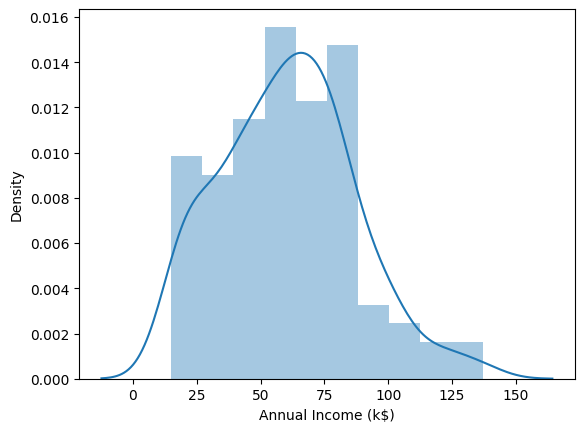

In [33]:
sns.distplot(df['Annual Income (k$)']);

In [34]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

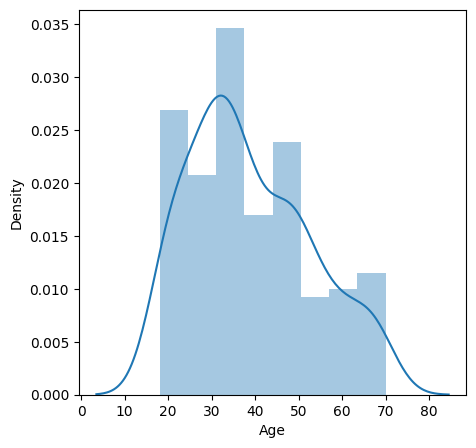

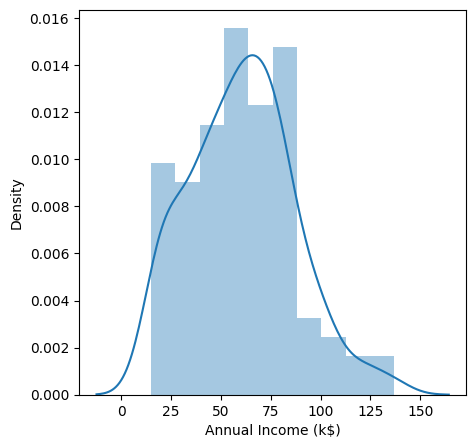

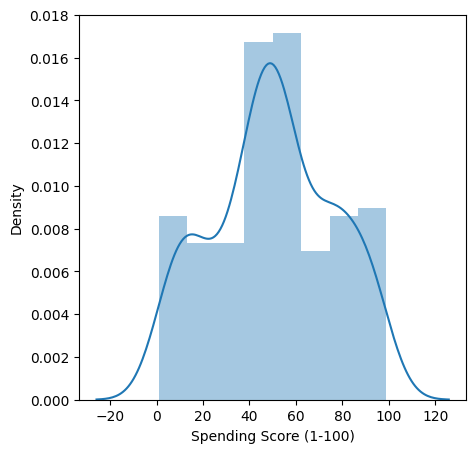

In [35]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure(figsize=(5,5))
  sns.distplot(df[i]);

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

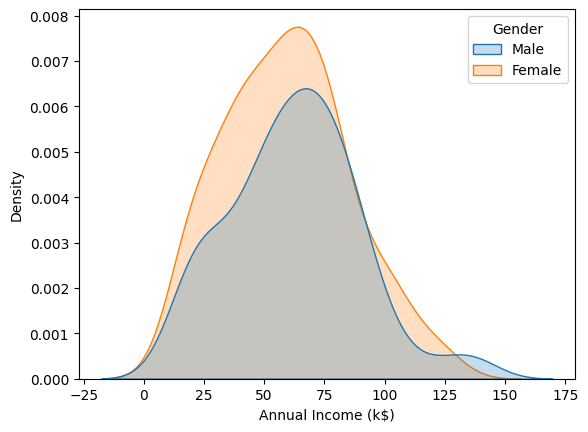

In [36]:
sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Gender')

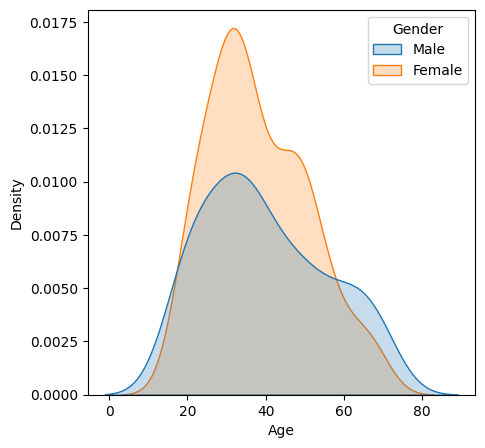

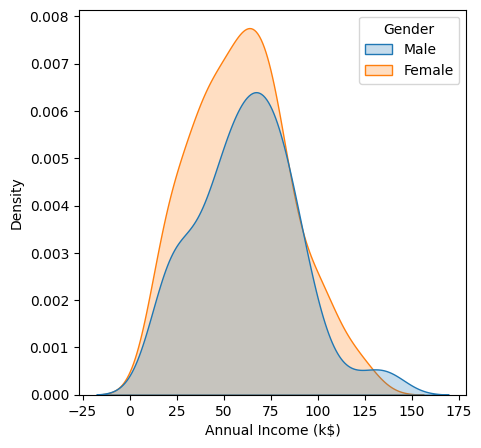

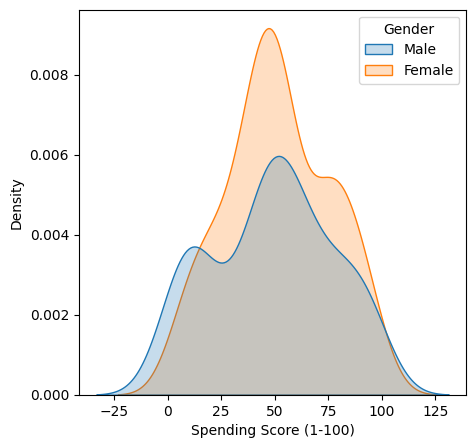

In [37]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure(figsize=(5,5))
  sns.kdeplot(data=df, x=i, shade=True, hue='Gender');

In [38]:
gender_stats = df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
display(gender_stats)

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [39]:
gender_counts = df.groupby('Gender').size()
display(gender_counts)

,0
Gender,
Female,112
Male,88


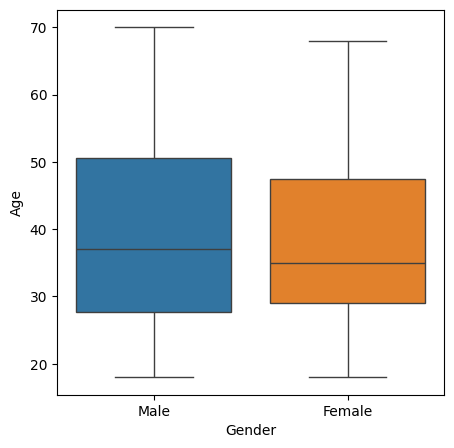

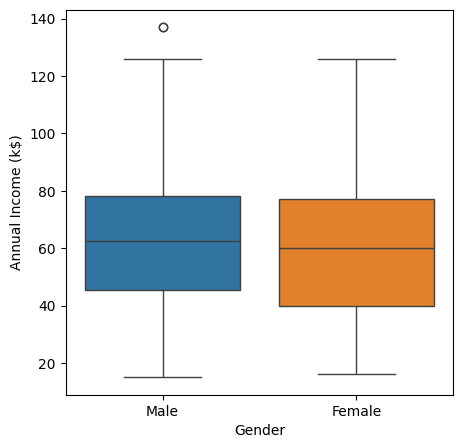

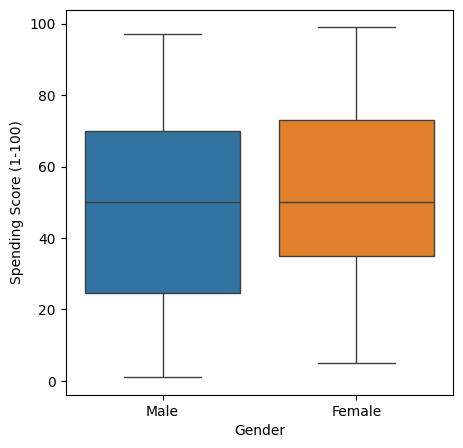

In [40]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure(figsize=(5,5))
  sns.boxplot(data=df, x='Gender', y=i,hue = 'Gender');

# Bivariate Analysis

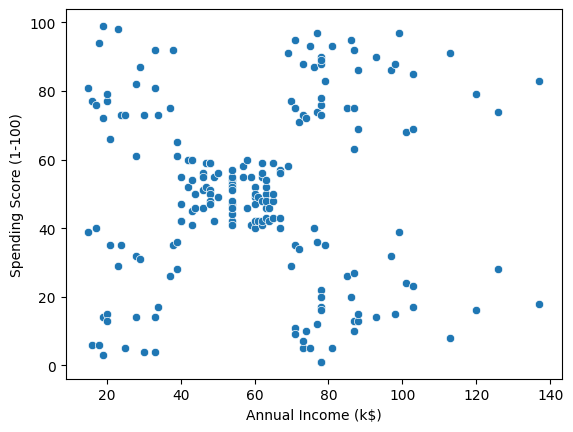

In [41]:
sns.scatterplot(data=df, x='Annual Income (k$)', y= 'Spending Score (1-100)');

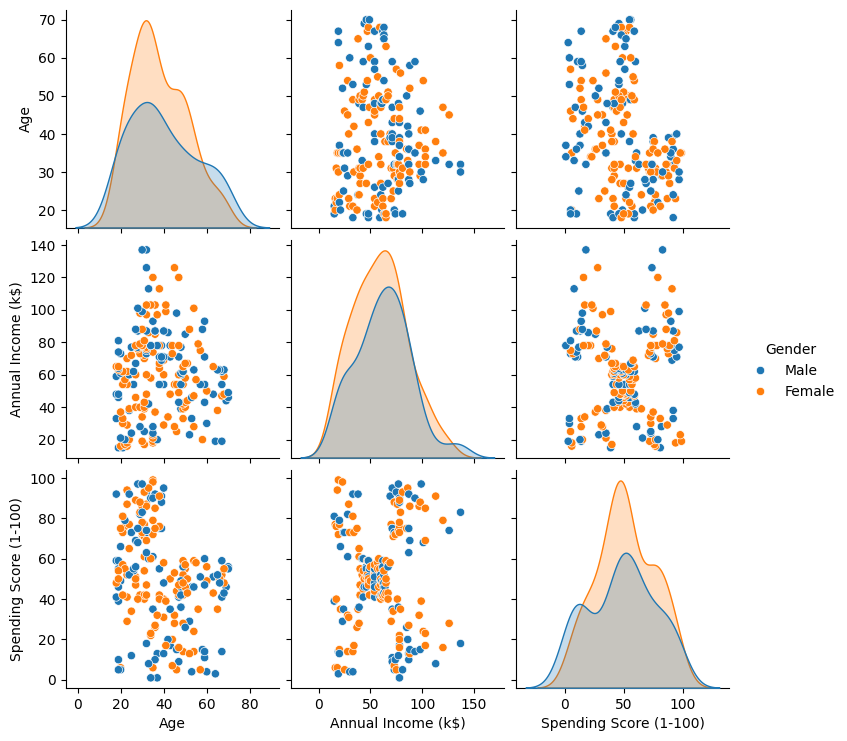

In [42]:
df = df.drop('CustomerID', axis=1)
sns.pairplot(df,hue='Gender')

In [43]:
x=df.drop('Gender', axis=1)
x.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

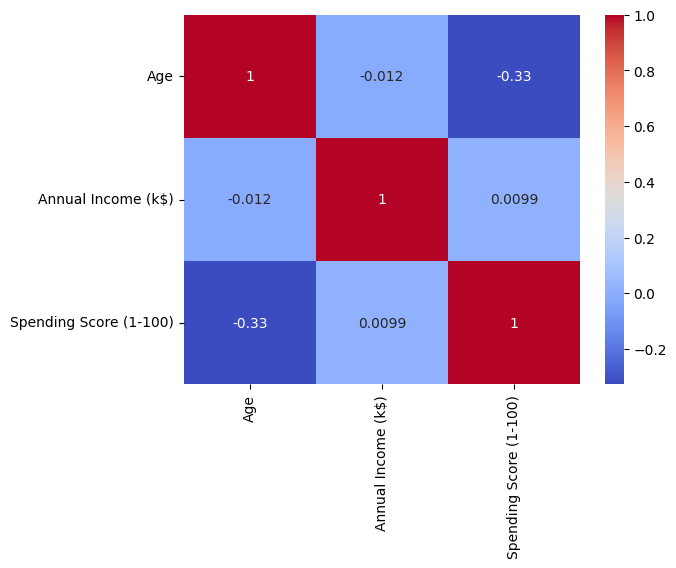

In [44]:
sns.heatmap(x.corr(), annot=True,cmap='coolwarm')

# Clustering Univariate, Bivariate, Multivariate

In [45]:
clustering1 = KMeans(n_clusters=3)

In [46]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [47]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [48]:
df['Income Cluster'].value_counts()

,count
Income Cluster,
2,86
0,58
1,56


In [49]:
inertia_score = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_score.append(kmeans.inertia_)
inertia_score

[137277.2800000002,
 48660.88888888887,
 23528.152173913048,
 15263.149206349204,
 8976.068665020044,
 5742.224880382768,
 4447.3728937728965,
 3361.85217852323,
 2168.478715728716,
 1808.8160173160177]

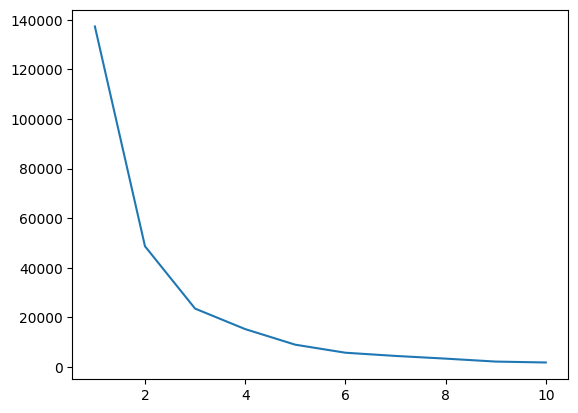

In [50]:
plt.plot(range(1,11),inertia_score)

In [51]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.120690,29.551724,49.689655
1,36.910714,92.142857,50.517857
2,41.279070,60.906977,50.337209


# Bivariate Clustering

In [52]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,2
1,Male,21,15,81,0,3
2,Female,20,16,6,0,2
3,Female,23,16,77,0,3
4,Female,31,17,40,0,2


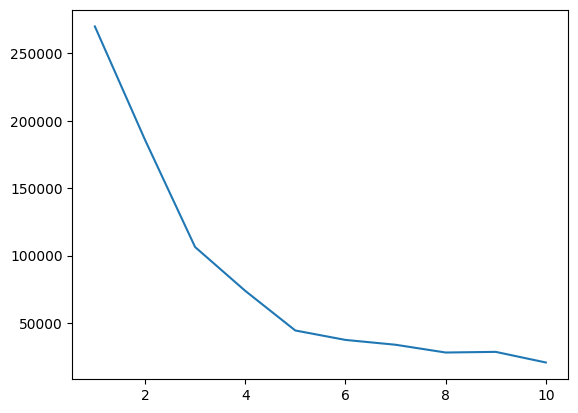

In [53]:
inertia_score = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  inertia_score.append(kmeans.inertia_)
inertia_score
plt.plot(range(1,11),inertia_score)

In [54]:
centres = pd.DataFrame(clustering2.cluster_centers_)
centres.columns = ['x', 'y']

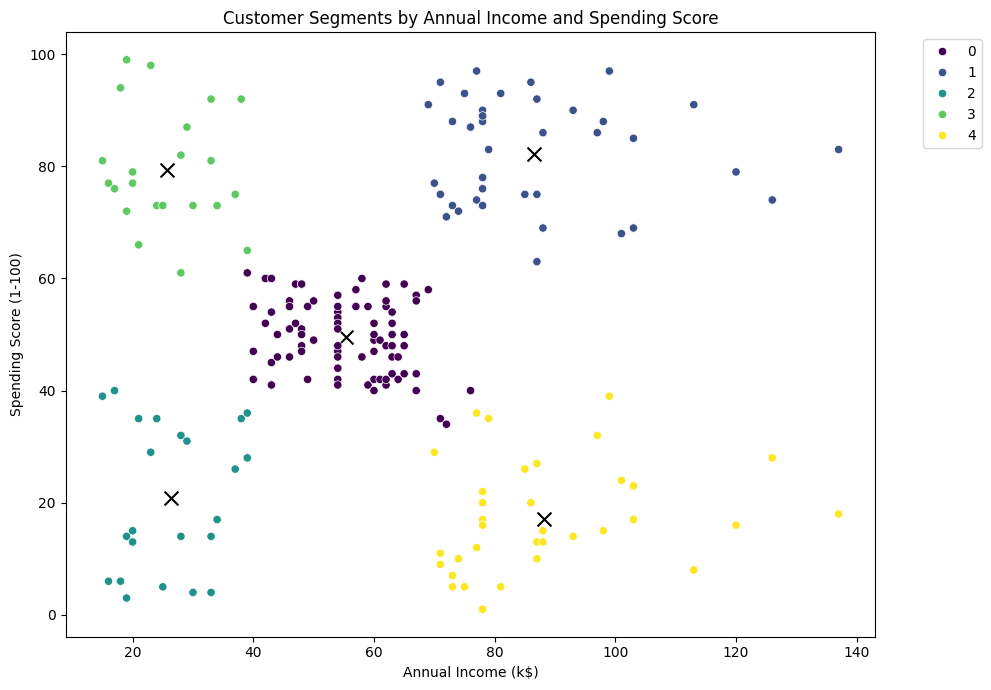

In [77]:
plt.figure(figsize=(10, 7))
plt.scatter(x=centres['x'], y=centres['y'], s=100, c='black', marker='x')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='viridis')
plt.title('Customer Segments by Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/customer_segments.png')
plt.show()

In [56]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'],normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.608696,0.391304
3,0.590909,0.409091
4,0.457143,0.542857


In [57]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,41.114286,88.200000,17.114286


#Multivariate Clustering

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [62]:
dff = pd.get_dummies(df, dtype=int,drop_first=True)
dff

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,0,2,1
1,21,15,81,0,3,1
2,20,16,6,0,2,0
3,23,16,77,0,3,0
4,31,17,40,0,2,0
...,...,...,...,...,...,...
195,35,120,79,1,1,0
196,45,126,28,1,4,0
197,32,126,74,1,1,1
198,32,137,18,1,4,1


In [70]:
!ls

customer_segments.png  sample_data


In [65]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [67]:
dff = pd.DataFrame(scaler.fit_transform(dff))
dff

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


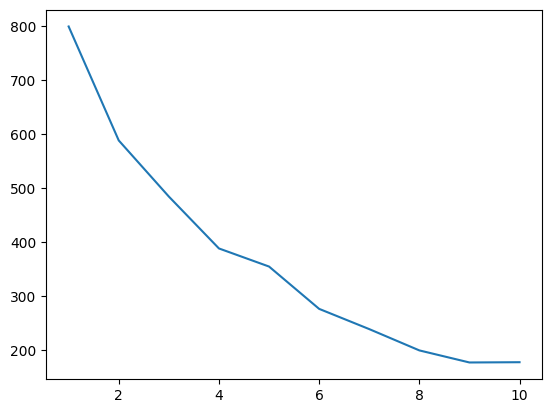

In [68]:
inertia_score3 = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(dff)
  inertia_score3.append(kmeans.inertia_)
inertia_score3
plt.plot(range(1,11),inertia_score3)